# Predicción de la Calidad del Vino Blanco
​
## Objetivos
​
Utilizamos el dataset(https://archive.ics.uci.edu/dataset/186/wine+quality) de P. Cortez, A. Cerdeira et al., que contiene datos sobre la composición química del vino blanco portugués. El objetivo final es construir un modelo que prediga la calidad del vino a partir de su composición química y clasifique la calidad del vino como buena o mala, basado en los datos de entrada.
​
##  Outline
1. Cargar y describir el conjunto de datos
2. Explorar los datos
3. Correlación entre características
4. Valores atípicos (outliers) y asimetría (Skewness)
5. Ingeniería de características
6. Modelado
7. Árboles de decisión con cross validation
8. Comparación de los modelos 
9. Exportamos mejor modelo
10. Importamos mejor modelo

In [74]:
#Instalamos xgboost
#XGBoost en Python es una herramienta poderosa y flexible para el análisis predictivo y el aprendizaje automático, 
#que combina la eficiencia computacional con la capacidad de manejar de forma eficaz una amplia variedad de tareas de modelado. 
!pip install xgboost 

In [75]:
# Importamos librerías
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Visualizaciones
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots as mp

# Dividir datos de entretaniemtno y prueba
from sklearn.model_selection import train_test_split

# Modelos de métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import tree
import time

# Ajuste de hyperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignorar los mensajes de warning
import warnings
warnings.filterwarnings('ignore')

## Cargamos y describimos el dataset

1. Subir el conjunto de datos
2. Contar el número de filas y columnas
3. Comprobar los tipos de datos
4. Observar los datos en sí
5. Obtener estadísticas descriptivas

Tenemos el conjunto de datos en crudo y los separamos con ';'

El conjunto de datos consta de 4898 filas y 12 columnas. Podemos ver la estructura del conjunto de datos con sus nombres de columnas y tipos de datos.  Los datos incluyen `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `density`,`pH`, `sulphates`, `alcohol`, `quality`. La mayoría de los datos son números flotantes, y solo la calidad es categórica, representada por un número entero.

Desde la descripción estadística, podemos obtener algunos conocimientos valiosos:

* No hay datos vacíos en el conjunto de datos: todas las celdas tienen valores;
* La calidad se califica de 3 a 8;
* Hay una diferencia bastante grande entre el valor máximo del `total sulfur dioxide` y su mediana, posiblemente tenga valores atípicos o sesgo;
* Lo mismo se puede decir sobre `residual sugar` and `free sulfur dioxide`; 
* Los datos en el dataset  están distribuidos de manera normal, ya que vemos bajas desviaciones entre las medias y medianas en las columnas;
* No hay una columna que podríamos usar como un ID de instancia. Sin embargo, no necesitamos operar con instancias únicas en este caso particular.

In [76]:
# Cargamos el dataset desde archivo csv en Github
github_path = 'https://raw.githubusercontent.com/carolProg/SNS_23_24/main/ACT_3_5_VINOS/winequality-white.csv'
data = pd.read_csv(github_path, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [77]:

# Describimos el dataset

print('--------------')
print('Filas, Columnas:')
print('--------------')
data.shape
print('---------------')
print("Nombres de Columnas:")
print('---------------')
data.columns
print('-----------------')
print('Columna / Tipo de Dato:')
print('-----------------')
data.dtypes
print('-----------------')
data.head(5)
print('---------------------')
print('Estadística Descriptiva:')
print('---------------------')
round(data.describe())
print('-----------------------')
print('La suma de los valores nulos:')
print('-----------------------')
print(data.isnull().sum())

--------------
Filas, Columnas:
--------------


(4898, 12)

---------------
Nombres de Columnas:
---------------


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

-----------------
Columna / Tipo de Dato:
-----------------


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

-----------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


---------------------
Estadística Descriptiva:
---------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,138.0,1.0,3.0,0.0,11.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,42.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,2.0,9.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,108.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,134.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,167.0,1.0,3.0,1.0,11.0,6.0
max,14.0,1.0,2.0,66.0,0.0,289.0,440.0,1.0,4.0,1.0,14.0,9.0


-----------------------
La suma de los valores nulos:
-----------------------
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Exploramos los Datos

Primero que nada, profundicemos en las características que contiene el conjunto de datos. Dado que el conjunto de datos se proporcionó sin descripción de las características, tenemos que investigarlas por nosotros mismos. A continuación, investigaremos las características y construiremos gráficos para encontrar correlaciones con la calidad.

In [78]:
def plot_feature_quality(data, feature_name, color_scale):
    grouped_class = data.groupby('quality')[feature_name].mean().reset_index()

    # Create the bar plot
    fig = go.Figure(data=go.Bar(
        x=grouped_class['quality'],
        y=grouped_class[feature_name],
        text=grouped_class[feature_name].apply(lambda x: f'{x:.2f}'),
        marker=dict(
            color=grouped_class[feature_name],
            colorscale=color_scale,
            colorbar=dict(
                title=f'{feature_name}'
            )
        )
    ))

    fig.update_layout(
        yaxis_title=f'Media {feature_name}',
        xaxis_title='Calidad',
        title={
            'text': f'Media {feature_name} que influye en la calidad del vino',
            'x': 0.5,
            'y': 0.9,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                size=15
            )
        }
    )
    
    return fig

### Acidez

In [79]:
color_scale = [
    [0.0, '#722255'],
    [1.0, '#e84aae']
]
fig = plot_feature_quality(data, 'fixed acidity', color_scale)
fig.show()

***Volatile Acidity*** 

In [80]:
color_scale = [
    [0.0, '#e84aae'],
    [1.0, '#722255']
]

fig = plot_feature_quality(data, 'volatile acidity', color_scale)
fig.show()

In [81]:
color_scale = [
    [0.0, '#e84aae'],
    [1.0, '#722255']
]

fig = plot_feature_quality(data, 'pH', color_scale)
fig.show()

### Dióxido de Azufre

In [82]:
color_scale = [
    [0.0, '#911cff'],
    [1.0, '#420a72']
]

fig = plot_feature_quality(data, 'total sulfur dioxide', color_scale)
fig.show()

***Dióxido de Azufre Libre***

In [83]:
color_scale = [
    [0.0, '#911cff'],
    [1.0, '#420a72']
]

fig = plot_feature_quality(data, 'free sulfur dioxide', color_scale)
fig.show()

### Azúcar Residual

In [84]:
color_scale = [
    [0.0, '#FDFD96'],
    [1.0, '#FFBE6A']
]

fig = plot_feature_quality(data, 'residual sugar', color_scale)
fig.show()

### Cloruros y Sulfatos

In [85]:
color_scale = [
    [0.0, '#BFBBED'],
    [1.0, '#5A4FCF']
]

fig = plot_feature_quality(data, 'chlorides', color_scale)
fig.show()

color_scale = [
    [0.0, '#DB8780'],
    [1.0, '#A3372E']
]

fig = plot_feature_quality(data, 'sulphates', color_scale)
fig.show()

### Alcohol

In [86]:
color_scale = [
    [0.0, '#5FD85F'],
    [1.0, '#228B22']
]

fig = plot_feature_quality(data, 'alcohol', color_scale)
fig.show()

## Correlaciones entre Características Cruzadas

In [87]:
#Matríz de Correlación 

corr_data = data[['quality', 'fixed acidity', 'volatile acidity',
              'citric acid', 'residual sugar', 'chlorides',
              'free sulfur dioxide', 'total sulfur dioxide',
              'density', 'pH', 'sulphates', 'alcohol']]

correlation_matrix = corr_data.corr()

# Creamos el mapa de calor

heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='agsunset'
)

layout = go.Layout(
    title={
        'text': 'Correlaciones entre características cruzadas',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 15}
    },
    xaxis=dict(title='Columnas'),
    yaxis=dict(title='Columnas'),
)

annotations = []

for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=correlation_matrix.columns[j],
                y=correlation_matrix.index[i],
                text=f'{value:.2f}',
                showarrow=False,
                font=dict(color='white'),
            )
        )

layout['annotations'] = annotations

fig = go.Figure(data=heatmap, layout=layout)

fig.show()

## Valores Atípicos y Asimetría

1. Verificar los valores atípicos (outliers)
2. Explorar las distribuciones de las características
3. Normalizar los datos

Como ya hemos visto, no hay valores faltantes en el conjunto de datos. Esto facilita el trabajo, ya que no necesitamos manejar esos espacios en blanco. Sin embargo, podría haber algunos valores atípicos que pueden afectar el modelado. Vamos a encontrarlos.

Como ilustran los siguientes gráficos, hay numerosos valores atípicos en la mayoría de las columnas. Vamos a verificar cuán sesgado está el conjunto de datos.

In [88]:
#Gráficos de cajas

fig = mp(rows=4, cols=3,
         subplot_titles=('F.Acidity', 'V.Acidity', 'C.Acidity',
                         'Residual sugar', 'Chlorides',
                         'Free sulfur dioxide', 'total sulfur dioxide',
                         'density', 'pH', 'sulphates'),
         specs=
          [
              [{}, {}, {}],
              [{}, {}, {}],
              [{}, {}, {}],
              [{}, {}, {}]
              ]
         )

fig = fig.add_traces([
                go.Box(y=data['fixed acidity'],
                       name = 'F.Acidity'),
                go.Box(y=data['volatile acidity'],
                       name = 'V.Acidity'),
                go.Box(y=data['citric acid'],
                       name = 'C.Acidity'),
                go.Box(y=data['residual sugar'],
                       name = 'Residual sugar'),
                go.Box(y=data['chlorides'],
                       name = 'Chlorides'),
                go.Box(y=data['free sulfur dioxide'],
                       name = 'Free sulfur dioxide'),
                go.Box(y=data['total sulfur dioxide'],
                       name = 'Total sulfur dioxide'),
                go.Box(y=data['density'],
                       name = 'Density'),
                go.Box(y=data['pH'],
                       name = 'pH'),
                go.Box(y=data['sulphates'],
                       name = 'Sulphates')],
               rows=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4],
               cols=[1, 2, 3, 1, 2, 3, 1, 2, 3, 1])

fig.update_layout(
        title={
        'text': "Distribuciones de las Características",
        'x': 0.5,
        'y': 0.975,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
        height=1350)

# Comprobamos la asimetría
print('--------------------')
print('Asimetría de los datos:')
print('--------------------')
round(data.skew(),2)

--------------------
Asimetría de los datos:
--------------------


fixed acidity           0.65
volatile acidity        1.58
citric acid             1.28
residual sugar          1.08
chlorides               5.02
free sulfur dioxide     1.41
total sulfur dioxide    0.39
density                 0.98
pH                      0.46
sulphates               0.98
alcohol                 0.49
quality                 0.16
dtype: float64

### Azúcar Residual 

In [89]:


fig = px.histogram(data['residual sugar'],
                   x="residual sugar",
                   y="residual sugar",
                   color=data['quality'],
                   marginal="box")

fig.update_layout(
    yaxis_title='Suma Azúcar Residual',
    xaxis_title='Azúcar Residual',
    title={
        'text': 'Distribución de Azúcar Residual para la Calidad',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=15
        )
    }
)

### Cloruros y Sulfatos

In [90]:
#@title Salts

fig = px.histogram(data['chlorides'],
                   x="chlorides",
                   y="chlorides",
                   color=data['quality'],
                   marginal="box")

fig.update_layout(
    yaxis_title='Suma Cloruros',
    xaxis_title='Cloruros',
    title={
        'text': 'Distribución de Cloruros para la Calidad',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=15
        )
    }
)

fig = px.histogram(data['sulphates'],
                   x="sulphates",
                   y="sulphates",
                   color=data['quality'], marginal="box")

fig.update_layout(
    yaxis_title='Suma Sulfatos',
    xaxis_title='Sulfatos',
    title={
        'text': 'Distribución of Sulfatos para la Calidad',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=15
        )
    }
)

In [91]:

data['chlorides'] = np.log10(data['chlorides'])
data['sulphates'] = np.log10(data['sulphates'])

print('---------------------')
print('Asimetría de los datos:')
print('---------------------')
round(data.skew(),2)

---------------------
Asimetría de los datos:
---------------------


fixed acidity           0.65
volatile acidity        1.58
citric acid             1.28
residual sugar          1.08
chlorides               1.13
free sulfur dioxide     1.41
total sulfur dioxide    0.39
density                 0.98
pH                      0.46
sulphates               0.23
alcohol                 0.49
quality                 0.16
dtype: float64

## Ingeniería de Características

1. Creando nuevas características
    - SO2 activo
    - dulzura del vino
    - pH bajo, pH alto
2. Codificación de la calidad en buena y mala 1/0
3. Eliminar azúcar y calidad
4. Escalado de los datos

In [92]:
#Nuevas caractrísticas

# Creamos active SO2 

data['active SO2'] = data['total sulfur dioxide'] - data['free sulfur dioxide']

# Creamos dulzura como un valor

conditions = [
    (data['residual sugar'] <= 4),
    (data['residual sugar'] > 4) & (data['residual sugar'] <= 12),
    (data['residual sugar'] > 12) & (data['residual sugar'] <= 45),
    (data['residual sugar'] > 45)
]

choices = [1, 2, 3, 4] # 1-seco, 2-semiseco, 3-semidulce, 4-dulce

data['sweetness'] = np.select(conditions, choices, default=np.nan)
data['sweetness'] = data['sweetness'].astype(int)

# Añadimos pH alto y bajo como una característica

conditions = [
    (data['pH'] <= 3.5),
    (data['pH'] >= 3.5) & ((data['pH'] < 3.6)),
    (data['pH'] >= 3.6)
]

choices = [1, 2, 3] # 1 - alto, 2 - medio, 3 - bajo

data['pH acidity'] = np.select(conditions, choices, default=np.nan)
data['pH acidity'] = data['pH acidity'].astype(int)

# Anadimos calidad codificada

conditions = [
    (data['quality'] <= 5),
    (data['quality'] > 5)
]

choices = [0, 1] # 0 - baja calidad, 1 - alta calidad

data['quality encoding'] = np.select(conditions, choices, default=np.nan)
data['quality encoding'] = data['quality encoding'].astype(int)

# Eliminamos las características innecesarias

data.drop('residual sugar', axis = 1, inplace=True)
data.drop('quality', axis = 1, inplace=True)

Justo antes de comenzar, echemos un vistazo a cómo esta codificación de calidad ha dividido nuestro conjunto de datos.

Como podemos ver, los vinos están distribuidos casi equitativamente entre buenos y malos. No necesitamos ajustar estos valores y podemos comenzar con la parte de modelado.

In [93]:
fig = px.pie(data, names='quality encoding',
             title='Distribución Vinos Buena (1) y Mala (0) Calidad',
             labels={'quality encoding':'Calidad'},
             width=700,
             height=500,
             hole=0.3)
fig.show()

In [94]:
#Escalado de datos

columns = ['fixed acidity', 'volatile acidity', 'citric acid',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
         'density', 'pH', 'sulphates', 'alcohol']

scaler = MinMaxScaler()
data[columns] = scaler.fit_transform(data[columns])

## Modelado

1. Dividir el dataset
2. Automatizar el ajuste de hiperparámetros
3. Modelado
    * Logistic Regression
    * Decision Tree con cross-validation
    * Random Forest con cross-validation
    * XGBoost con cross-validation
    * ExtraTreesClassifier con cross-validation
    * GradientBoostingClassifier con cross-validation
4. Evaluar los resultados


### Dividimos el dataset
Primero, dividimos el conjunto de datos en conjuntos de entrenamiento y de prueba. Estableceremos los conjuntos de entrenamiento/prueba como 80/20 del dataset original.

In [95]:
#Dividimos el dataset

X = data.drop('quality encoding', axis=1)
y = data['quality encoding']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Automatizar el ajuste de hiperparámetros

Usaremos los algoritmos de Búsqueda en Rejilla (GridSearch) y Búsqueda Aleatoria (Random Search) para el ajuste de hiperparámetros. GridSearch nos ayuda a encontrar la mejor combinación de hiperparámetros para obtener los mejores resultados del modelo. Hay muchos modelos para esa tarea. Sin embargo, GridSearch es bastante bueno cuando se trata de ajustar modelos con un número comparativamente pequeño de hiperparámetros.

Cuando se trata de modelos con un espacio grande o continuo de hiperparámetros, GridSearch podría no ser la mejor opción, ya que requiere suficientes recursos computacionales. La alternativa puede ser la Búsqueda Aleatoria. La Búsqueda Aleatoria nos permite definir un rango para cada hiperparámetro y muestrear aleatoriamente de estos rangos. Es una buena opción cuando el costo computacional es un problema.

Por lo tanto, aplicaremos Búsqueda en Rejilla (GridSearch) a modelos simples, como la Regresión Logística y Decision Tree. Y aplicaremos Búsqueda Aleatoria (Random Search) para los modelos Random Forest,XGBoost, Extra Trees, Gradient Boosting.

In [96]:
#Grid Search

def hyperp_search(classifier, parameters, cv):
    gs = GridSearchCV(classifier,
                      parameters,
                      cv=cv,
                      scoring = 'f1',
                      verbose=0,
                      n_jobs=-1
                      )
    tic = time.perf_counter()
    gs = gs.fit(X_train, y_train)
    toc = time.perf_counter()

    print("f1_train: %f using %s in %.3f seconds" % (gs.best_score_,
                                                     gs.best_params_,
                                                     toc - tic))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluamos las predicciones
    print("           train    test ")
    print("-------------------------")
    print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train),
                                       f1_score(y_test, y_pred)))
    print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train),
                                       accuracy_score(y_test, y_pred)))
    print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train),
                                       precision_score(y_test, y_pred)))
    print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train),
                                       recall_score(y_test, y_pred)))
    print("")


    # Calculamos la curva ROC 

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr) # Calculamos el área bajo la curva ROC 

    # Graficamos la curva ROC

    fig = px.area(
        x=fpr, y=tpr,
        title=f'Curva ROC (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.show()

    # Dibujamos la matríz de Confusión

    cm = confusion_matrix(y_test, y_pred)

    fig = px.imshow(
        cm,
        labels=dict(x="Predicted Label", y="True Label", color="Count"),
        x=['Predicted 0', 'Predicted 1'],
        y=['Actual 0', 'Actual 1'],
        text_auto=True,
        color_continuous_scale="PuBu",
        title="Matríz de Confusión",
        width=700, height=500
    )

    fig.show()

    return gs.best_estimator_

In [97]:
#Randomized Search

def hyperp_search_random(classifier, parameters, cv):
    gs = RandomizedSearchCV(classifier,
                            parameters,
                            cv=cv,
                            scoring = 'f1',
                            verbose=0,
                            n_jobs=-1,
                            random_state = 82
                           )
    tic = time.perf_counter()
    gs = gs.fit(X_train, y_train)
    toc = time.perf_counter()

    print("f1_train: %f using %s in %.3f seconds" % (gs.best_score_,
                                                     gs.best_params_,
                                                     toc - tic))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluamos la predicción
    print("           train    test ")
    print("-------------------------")
    print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train),
                                       f1_score(y_test, y_pred) ))
    print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train),
                                       accuracy_score(y_test, y_pred) ))
    print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train),
                                       precision_score(y_test, y_pred) ))
    print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train),
                                       recall_score(y_test, y_pred) ))
    print("")

    # Calculamos la curva ROC 

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr) # Calculamos el área bajo la curva ROC

    # Dibujamos la curva ROC

    fig = px.area(
        x=fpr, y=tpr,
        title=f'Curva ROC (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.show()

    # Dibujamos la matríz de Confusión

    cm = confusion_matrix(y_test, y_pred)

    fig = px.imshow(
        cm,
        labels=dict(x="Predicted Label", y="True Label", color="Count"),
        x=['Predicted 0', 'Predicted 1'],
        y=['Actual 0', 'Actual 1'],
        text_auto=True,
        color_continuous_scale="PuBu",
        title="Matríz de Confusión",
        width=700, height=500
    )

    fig.show()

    return gs.best_estimator_

### Regresión Logística

La Regresión Logística es un modelo simple pero poderoso para clasificaciones binarias. En la mayoría de los proyectos de la vida real lo usamos tanto para tener una predicción sólida como para tener un punto de referencia para modelos más sofisticados.

Después de hacer el modelado, podemos recuperar las características más valiosas. Para el modelo de RL (Regresión Logística)  `alcohol`, `sulphates` y `volatile acidity`.

In [98]:
#LR

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1,10,1000], "max_iter":[500,1000,5000] }
cv = 5
best_log = hyperp_search(classifier,parameters,cv)

# Buscamos las mejores características

importance_log = pd.DataFrame()
importance_log["feature"]=X_train.columns
importance_log["weight"]=best_log.coef_[0].round(2)
importance_log.sort_values(by=['weight'], inplace=True)

# Graficamos las características

fig = px.bar(importance_log,
             x='feature',
             y='weight',
             color='feature',
             labels={'feature': 'Feature',
                     'weight': 'Weight'},
             title='Análisis de coeficientes para la Regresión Logística',
             color_discrete_sequence=px.colors.sequential.Blues_r,
             text='weight')

fig.update_layout(
    xaxis=dict(tickangle=90, categoryorder='total descending'),
    legend=dict(title='Feature')
)

f1_train: 0.827198 using {'C': 10, 'max_iter': 500} in 2.648 seconds
           train    test 
-------------------------
f1         0.828    0.821
accuracy   0.756    0.742
precision  0.779    0.769
recall     0.883    0.880



### Decision Tree

Decision Tree es un modelo jerárquico para problemas de clasificación. El modelo ofrece un rendimiento predictivo comparativamente alto y una gran capacidad de explicación.

Nuestro Decision Tree encontró las mejores características en  `alcohol`, `sulphates` y `total sulphur dioxide`.

In [99]:
#DT

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'],
              'max_depth': [4,5,6,8,10,12],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}
cv = 5
best_tree = hyperp_search(classifier,parameters,cv)

# Finding the best feature

importance_tree = tree.export_text(best_tree,
                                   feature_names=X_test.columns.tolist(),
                                   max_depth=2)

print("-------------------------------")
print("Las características más importantes son: ")
print("-------------------------------")
print(importance_tree)

f1_train: 0.822015 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10} in 1.003 seconds
           train    test 
-------------------------
f1         0.848    0.825
accuracy   0.791    0.758
precision  0.822    0.803
recall     0.875    0.848



-------------------------------
Las características más importantes son: 
-------------------------------
|--- alcohol <= 0.34
|   |--- volatile acidity <= 0.15
|   |   |--- free sulfur dioxide <= 0.07
|   |   |   |--- truncated branch of depth 3
|   |   |--- free sulfur dioxide >  0.07
|   |   |   |--- truncated branch of depth 3
|   |--- volatile acidity >  0.15
|   |   |--- volatile acidity <= 0.20
|   |   |   |--- truncated branch of depth 3
|   |   |--- volatile acidity >  0.20
|   |   |   |--- truncated branch of depth 3
|--- alcohol >  0.34
|   |--- free sulfur dioxide <= 0.03
|   |   |--- alcohol <= 0.60
|   |   |   |--- truncated branch of depth 3
|   |   |--- alcohol >  0.60
|   |   |   |--- truncated branch of depth 3
|   |--- free sulfur dioxide >  0.03
|   |   |--- alcohol <= 0.48
|   |   |   |--- truncated branch of depth 3
|   |   |--- alcohol >  0.48
|   |   |   |--- truncated branch of depth 3



### Random Forest
​
Random Forest es uno de los modelos más populares para tareas de clasificación.  Es poderoso ya que combina un conjunto de árboles de decisión y un algoritmo sofisticado de validación cruzada.
​
Después de modelar, podemos visualizar qué características son las más importantes para que RF haga una predicción.
 
Calculamos la importancia de las características basada en la disminución media de la impureza (MDI). Se calcula como la media y la desviación estándar de la acumulación de la disminución de la impureza dentro de cada árbol del bosque. Basado en el MDI, las características más valiosas son `alcohol`, `sulphates`, `active sulphur dioxide` y `volatile acidity`.

In [100]:
#RF

classifier = RandomForestClassifier()
parameters = {'criterion': ['entropy'],
              'n_estimators' : [50,100,500,1000],
              'max_depth': range(2,20,2),
              'min_samples_leaf':[100,250,500]}
cv = 5
best_rf = hyperp_search_random(classifier,parameters,cv)

# Buscando las mejores características

feature_importances = best_rf.feature_importances_
importance_rf = pd.DataFrame({'Feature': X_train.columns,
                              'Weight': feature_importances}).round(3)
importance_rf = importance_rf.sort_values(by='Weight', ascending=False)

# Dibujamos las características importantes

fig = px.bar(importance_rf, x='Feature', y='Weight', color='Feature',
             title='Importancia de las características para RandomForest Classifier',
             color_discrete_sequence=px.colors.sequential.Blues_r,
             text='Weight')

fig.update_layout(xaxis=dict(tickangle=90),
                  legend=dict(title='Feature'))

f1_train: 0.835325 using {'n_estimators': 1000, 'min_samples_leaf': 100, 'max_depth': 16, 'criterion': 'entropy'} in 9.041 seconds
           train    test 
-------------------------
f1         0.846    0.819
accuracy   0.781    0.740
precision  0.792    0.769
recall     0.909    0.877



### XGBoost

El aumento de gradiente extremo es un modelo de aumento de gradiente distribuido y escalable. Funciona como un conjunto de árboles de decisión. Es una herramienta poderosa para tareas como la regresión, clasificación y ranking.

Posteriormente, podemos observar que `alcohol`, `sulphates`, `pH acidity` y `volatile acidity` son los que más contribuyen a la predicción del modelo.

In [101]:
#XGB

classifier = XGBClassifier()
parameters = {"learning_rate":[0.001, 0.01, 0.1],
              "min_child_weight" : [5, 10, 20],
              "max_depth":[2,4,6,8,10,12],
              "subsample" : [0.5],
              "colsample_bytree" : [0.5],
              "enable_categorical" : [True],
              "objective" : ['binary:logistic'],
              "n_estimators":[50, 100, 500],
              "seed" :[42]}
cv = 10
best_xgb = hyperp_search_random(classifier,parameters,cv)

# Buscamos las mejores características

feature_importances = best_xgb.feature_importances_
importance_xgb = pd.DataFrame({'Feature': X_train.columns,
                               'Weight': feature_importances}).round(3)
importance_xgb = importance_xgb.sort_values(by='Weight', ascending=False)

# Dibujamos la importancia de las características

fig = px.bar(importance_xgb, x='Feature', y='Weight', color='Feature',
             title='Importancia de las características para XGBoosting',
             color_discrete_sequence=px.colors.sequential.Blues_r,
             text=importance_xgb['Weight'].apply(lambda x: f'{x:.3f}'),
             hover_data=['Feature', 'Weight'])

fig.update_layout(xaxis=dict(tickangle=90), legend=dict(title='Feature'))

f1_train: 0.844524 using {'subsample': 0.5, 'seed': 42, 'objective': 'binary:logistic', 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.1, 'enable_categorical': True, 'colsample_bytree': 0.5} in 1.613 seconds
           train    test 
-------------------------
f1         0.876    0.840
accuracy   0.830    0.779
precision  0.848    0.818
recall     0.906    0.863



##  ExtraTrees Classifier

ExtraTreesClassifier es una variación del método de ensamblaje Random Forests, incluido en la biblioteca de aprendizaje automático scikit-learn de Python. Pertenece a la familia de algoritmos de ensamblaje de árboles de decisión y es utilizado para tareas de clasificación. El nombre "ExtraTrees" viene de "Extremely Randomized Trees" (Árboles Extremadamente Aleatorizados), y este método se diferencia principalmente de los Random Forests en la forma en que selecciona los cortes para dividir los nodos de los árboles.

Posteriormente, podemos observar que `alcohol`, `sulphates`, `citric acid` y `volatile acidity` son los que más contribuyen a la predicción del modelo.

In [102]:
#ET

# Definición del clasificador y los parámetros para la búsqueda
classifier = ExtraTreesClassifier()
parameters = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [50, 100, 500, 1000],
    'max_depth': range(2, 20, 2),
    'min_samples_leaf': [100, 250, 500]
}
cv = 5

# Realizamos la búsqueda de hiperparámetros
best_et = hyperp_search_random(classifier, parameters, cv)

# Después de encontrar el mejor clasificador, calculamos la importancia de las características
feature_importances = best_et.feature_importances_

# Creamos un DataFrame con las características y sus importancias
importance_et = pd.DataFrame({'Feature': X_train.columns,
                              'Weight': feature_importances}).round(3)

# Ordenamos las características por su importancia
importance_et = importance_et.sort_values(by='Weight', ascending=False)

# Dibujamos las características importantes
fig = px.bar(importance_et, x='Feature', y='Weight', color='Feature',
             title='Importancia de las características para ExtraTrees Classifier',
             color_discrete_sequence=px.colors.sequential.Blues_r,
             text='Weight')

# Ajustamos la visualización
fig.update_layout(xaxis=dict(tickangle=90),
                  legend=dict(title='Feature'))


f1_train: 0.797729 using {'n_estimators': 100, 'min_samples_leaf': 100, 'max_depth': 12, 'criterion': 'entropy'} in 1.696 seconds
           train    test 
-------------------------
f1         0.798    0.804
accuracy   0.663    0.672
precision  0.663    0.672
recall     1.000    1.000



## Gradient Boosting Classifier

Gradient Boosting Classifier es particularmente poderoso para problemas de clasificación y regresión, ya que construye un modelo aditivo de manera progresiva en etapas; también proporciona la importancia de las características directamente, lo que facilita la interpretación del modelo.

Podemos observar que `alcohol`, `sulphates` y `volatile acidity` son los que más contribuyen a la predicción del modelo.

In [103]:
#GB

# Definición del clasificador y los parámetros para la búsqueda
classifier = GradientBoostingClassifier()
parameters = {
    'learning_rate': [0.001, 0.01, 0.1],
    'min_samples_leaf': [5, 10, 20],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'subsample': [0.5],
    'max_features': ['sqrt', 0.5],  # Equivalentes a 'colsample_bytree' en XGBoost
    'n_estimators': [50, 100, 500],
    'random_state': [42]  # 'seed' en XGBoost es equivalente a 'random_state' en scikit-learn
}
cv = 10

# Asumiendo que hyperp_search_random es una función definida para realizar RandomizedSearchCV
best_gb = hyperp_search_random(classifier, parameters, cv)

# Después de encontrar el mejor clasificador, calculamos la importancia de las características
feature_importances = best_gb.feature_importances_

# Creamos un DataFrame con las características y sus importancias
importance_gb = pd.DataFrame({'Feature': X_train.columns,
                              'Weight': feature_importances}).round(3)

# Ordenamos las características por su importancia
importance_gb = importance_gb.sort_values(by='Weight', ascending=False)

# Dibujamos la importancia de las características
fig = px.bar(importance_gb, x='Feature', y='Weight', color='Feature',
             title='Importancia de las características para Gradient Boosting',
             color_discrete_sequence=px.colors.sequential.Blues_r,
             text=importance_gb['Weight'].apply(lambda x: f'{x:.3f}'),
             hover_data=['Feature', 'Weight'])

fig.update_layout(xaxis=dict(tickangle=90), legend=dict(title='Feature'))



f1_train: 0.866084 using {'subsample': 0.5, 'random_state': 42, 'n_estimators': 500, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 6, 'learning_rate': 0.1} in 9.213 seconds
           train    test 
-------------------------
f1         1.000    0.879
accuracy   1.000    0.835
precision  1.000    0.864
recall     1.000    0.895



## Comparando los modelos

Comparamos los modelos basándonos en F1 score y la precisión. F1 score proporciona un equilibrio entre la precisión y la sensibilidad de las salidas del modelo. La precisión es fácil de entender, ya que es una proporción de instancias predichas correctamente en el conjunto de datos.
​
El modelo Gradient Boosting ha demostrado el mejor rendimiento entre todos. Nos proporcionó niveles bastante altos de F1 y precisión en el conjunto de datos de prueba, seguido del modelo Árbol de Decisión.
El modelo Random Forest y la Regresión Logística también tuvieron un buen desempeño. Sin embargo, la Regresión Logística mostró una precisión ligeramente superior y un F1 significativamente mayor. 
El modelo Extra Trees no tuvo un buen desempeño en este proyecto.

​
Las características más valiosas para predecir la calidad del vino son las mismas en todos los modelos:
​
1. alcohol;
2. sulfatos;
3. dióxido de azufre total;
4. dióxido de azufre activo;
5. acidez volátil;

In [104]:
#Comparación

models = ["Logistic Regression",
          'Decision Tree',
          'Random Forest',
          'XGBoost',
          'Extra Trees',
          'Gradient Boosting'        
         ]

f1_scores = [f1_score(y_test, best_log.predict(X_test)),
             f1_score(y_test, best_tree.predict(X_test)),
             f1_score(y_test, best_rf.predict(X_test)),
             f1_score(y_test, best_xgb.predict(X_test)),
             f1_score(y_test, best_et.predict(X_test)),
             f1_score(y_test, best_gb.predict(X_test))]
accuracy_scores = [accuracy_score(y_test, best_log.predict(X_test)),
                   accuracy_score(y_test, best_tree.predict(X_test)),
                   accuracy_score(y_test, best_rf.predict(X_test)),
                   accuracy_score(y_test, best_xgb.predict(X_test)),
                   accuracy_score(y_test, best_et.predict(X_test)),
                   accuracy_score(y_test, best_gb.predict(X_test))                  
                  ]

table = pd.DataFrame({"Model": models,
                      "F1 Score": f1_scores,
                      "Accuracy": accuracy_scores})

table = table.sort_values(by="F1 Score", ascending=False)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Model',
                        'F1 Score',
                        'Accuracy']),
    cells=dict(values=[table["Model"],
                       table["F1 Score"].round(3),
                       table["Accuracy"].round(3)])
)])

fig.update_layout(
    title={
        'text': 'Comparamos los modelos',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 15}
    },
    width=1000,
    height=400)

# Identificar el mejor modelo basado en la puntuación F1
best_model = table.iloc[0]  # Ya que la tabla está ordenada por F1 Score, el primer elemento es el mejor

# Extraer el nombre y las métricas del mejor modelo
best_model_name = best_model['Model']
best_model_f1_score = best_model['F1 Score']
best_model_accuracy = best_model['Accuracy']

# Mostrar la información del mejor modelo
print(f"El mejor modelo es {best_model_name} con una puntuación F1 de {best_model_f1_score:.3f} y una precisión (Accuracy) de {best_model_accuracy:.3f}.")


El mejor modelo es Gradient Boosting con una puntuación F1 de 0.879 y una precisión (Accuracy) de 0.835.


## Resultados
La tabla muestra una comparación de varios modelos de aprendizaje automático evaluados según su puntaje F1 y precisión (accuracy). A continuación, se presenta un análisis detallado de los resultados:

**Gradient Boosting:**
* F1 Score: 0.88
* Accuracy: 0.836
- Análisis: Este modelo ha demostrado el mejor rendimiento en ambas métricas. Un puntaje F1 alto indica un buen equilibrio entre la precisión y la sensibilidad, mientras que una precisión alta significa que el modelo predijo correctamente una gran proporción de instancias. Este es el mejor modelo de la lista.


**Decision Tree:**
* F1 Score: 0.837
* Accuracy: 0.778
- Análisis: El árbol de decisión tiene el segundo mejor puntaje F1, ligeramente por debajo del Gradient Boosting. Su precisión es significativamente más baja que la de Gradient Boosting, lo que podría indicar que aunque el balance entre precisión y exhaustividad es bueno, tiende a cometer más errores en sus predicciones.


**XGBoost:**
* F1 Score: 0.835
* Accuracy: 0.77
- Análisis: XGBoost, que es una forma optimizada de Gradient Boosting, tiene un puntaje F1 muy cercano al del Decision Tree, pero con una precisión ligeramente menor. Esto sugiere que es un modelo bastante robusto, pero no el mejor en este conjunto de datos en particular.


**Logistic Regression:**
* F1 Score: 0.829
* Accuracy: 0.752
- Análisis: La regresión logística tiene un rendimiento inferior a los modelos de boosting y al árbol de decisión tanto en el puntaje F1 como en la precisión. Sin embargo, sigue siendo relativamente alto, lo que indica una capacidad aceptable para clasificar correctamente las instancias..


**Random Forest:**
* F1 Score: 0.82
* Accuracy: 0.741
- Análisis: El Random Forest, que es un ensamble de árboles de decisión, tiene un rendimiento menor que los modelos anteriores. Aunque es conocido por su capacidad para reducir el sobreajuste, en este caso, no es el modelo con mejor rendimiento según estos criterios.


**Extra Trees:**
* F1 Score: 0.804
* Accuracy: 0.672
- Análisis: Extra Trees, otro tipo de ensamble de árboles de decisión, tiene el puntaje F1 más bajo y la precisión más baja de todos los modelos en la tabla. Esto sugiere que es el que menos se adapta a este conjunto de datos específico según los criterios de evaluación presentados.



## Conclusiones Generales:
En resumen, de acuerdo con esta tabla, el modelo Gradient Boosting es el que mejor rendimiento tiene en este conjunto de datos específico, seguido muy de cerca por el Decision Tree y XGBoost. Los modelos basados en ensambles de árboles como Random Forest y Extra Trees tienen un rendimiento inferior en este caso. Es importante notar que el mejor modelo puede variar dependiendo del contexto específico y los datos con los que se trabaje. Además, otros factores como la interpretabilidad del modelo, el tiempo de entrenamiento y la capacidad para manejar datos no vistos podrían influir en la elección del modelo final.

In [105]:
#@Comparación curvas ROC

log_fpr, log_tpr, _ = roc_curve(y_test, best_log.predict(X_test))
tree_fpr, tree_tpr, _ = roc_curve(y_test, best_tree.predict(X_test))
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf.predict(X_test))
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, best_xgb.predict(X_test))
et_fpr, et_tpr, _ = roc_curve(y_test, best_et.predict(X_test))
gb_fpr, gb_tpr, _ = roc_curve(y_test, best_gb.predict(X_test))
log_auc = auc(log_fpr, log_tpr)
tree_auc = auc(tree_fpr, tree_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
et_auc = auc(et_fpr, et_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

models = ["Logistic Regression",
          'Decision Tree',
          'Random Forest',
          'XGBoost',
          'Extra Trees',
          'Gradient Boosting'        
         ]

fprs = [log_fpr, tree_fpr, rf_fpr, xgb_fpr,et_fpr,gb_fpr]
tprs = [log_tpr, tree_tpr, rf_tpr, xgb_tpr,et_tpr,gb_tpr]
auc_scores = [log_auc, tree_auc, rf_auc, xgb_auc,et_auc,gb_auc]

fig = go.Figure()

# Añadimos la línea de referencia

fig = fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
)

# Anadimos las curvas ROC para cada modelo

for i in range(len(models)):
    name = f"{models[i]} (AUC={auc_scores[i]:.2f})"
    fig = fig.add_trace(go.Scatter(x=fprs[i],
                                   y=tprs[i],
                                   name=name,
                                   mode='lines'))

# Actualizamos layout

fig.update_layout(
    title={
        'text': 'Curvas ROC de los Modelos',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 15}
    },
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)

# Entrenamiento del modelo

1. Se exporta el modelo
2. Se importa el modelo y se vuelven a predecir los datos de predicción.

In [106]:
# Identificar el mejor modelo basado en la puntuación F1
best_model_white = table.iloc[0]  # Ya que la tabla está ordenada por F1 Score, el primer elemento es el mejor

# Extraer el nombre y las métricas del mejor modelo
best_model_name = best_model_white['Model']
best_model_f1_score = best_model_white['F1 Score']
best_model_accuracy = best_model_white['Accuracy']

# Mostrar la información del mejor modelo
print(f"El mejor modelo es {best_model_name} con una puntuación F1 de {best_model_f1_score:.3f} y una precisión (Accuracy) de {best_model_accuracy:.3f}.")


El mejor modelo es Gradient Boosting con una puntuación F1 de 0.879 y una precisión (Accuracy) de 0.835.


In [107]:
# Para exportar el modelo best_gb a un archivo utilizamos la biblioteca joblib. La instalamos
!pip install joblib

In [110]:
import joblib

# Exportar el modelo
joblib.dump(best_gb, 'best_gb_model.joblib')

print(f"Modelo {best_model_name} exportado exitosamente como 'best_gb_model.joblib'.")


['best_gb_model.joblib']

Modelo Gradient Boosting exportado exitosamente como 'best_gb_model.joblib'.


In [111]:
# Cargar el modelo previamente guardado
loaded_model = joblib.load('best_gb_model.joblib')

print("Modelo cargado exitosamente.")


Modelo cargado exitosamente.


<Axes: >

Text(70.72222222222221, 0.5, 'Etiquetas verdaderas')

Text(0.5, 36.72222222222221, 'Etiquetas predichas')

Text(0.5, 1.0, 'Matriz de Confusión')

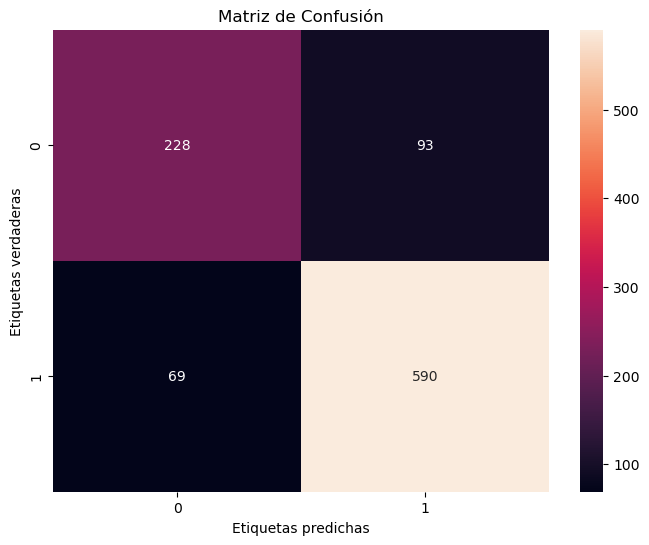

In [113]:
# Ejemplo de cómo hacer predicciones con el modelo cargado

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asumiendo que `loaded_model` es nuestro modelo cargado y que tenemos `X_test` y `y_test`

# 1. Realizar predicciones
y_pred = loaded_model.predict(X_test)

# 2. Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# 3. Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas')
plt.title('Matriz de Confusión')
plt.show()

  

In [ ]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
print(f"La precisión del modelo sobre el conjunto de prueba es: {accuracy:.3f}")


**Obtenemos la precisión del resultado obtenido que coincide con la precisión que se calculó durante el entrenamiento: 0.836**